In [1]:
"""
Update Parameters Here
"""
FILE = "Quaks"
TOKEN_COL = "TOKEN_ID"

""" 
Optional parameters
Customise these values and set ZOOM_IN to True if you want to zoom in on a specific range
"""
ZOOM_IN = False

Y_LIM = 6000
LOWER_BOUND = 0
UPPER_BOUND = 6000
TOP_N = 6000

In [2]:
"""
@author: mdigi14
"""

import pandas as pd
import matplotlib.pyplot as plt
import math

from honestnft_utils import config

"""
Plot params
"""
plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

"""
Helper Functions
"""


def print_graph(RARITY_DB: pd.DataFrame, zoom_in: bool = False) -> None:
    if zoom_in:
        y_lim = Y_LIM
        lower_bound = LOWER_BOUND
        upper_bound = UPPER_BOUND
        top_n = TOP_N
    else:
        # Count number of tokens in Rarity DB and round up to nearest 100
        TOKEN_COUNT = int(math.ceil(max(RARITY_DB[TOKEN_COL] / 100.0)) * 100)
        y_lim = upper_bound = top_n = TOKEN_COUNT
        lower_bound = 0

    if TOKEN_COL == "TOKEN_NAME":
        RARITY_DB["TOKEN_ID"] = (
            RARITY_DB["TOKEN_NAME"].str.split("#").str[1].astype(int)
        )

    RARITY_DB = RARITY_DB.sort_values("TOKEN_ID")

    ax = RARITY_DB.plot.scatter(
        x="TOKEN_ID",
        y="Rank",
        grid=True,
        alpha=0.25,
        title="{} - Token ID vs Rank (low rank is more rare)".format(FILE),
        figsize=(14, 7),
    )

    ax.set_xlabel("Token ID")
    ax.set_ylabel("Rarity Rank")
    plt.xlim(lower_bound, upper_bound)
    plt.ylim(0, top_n)

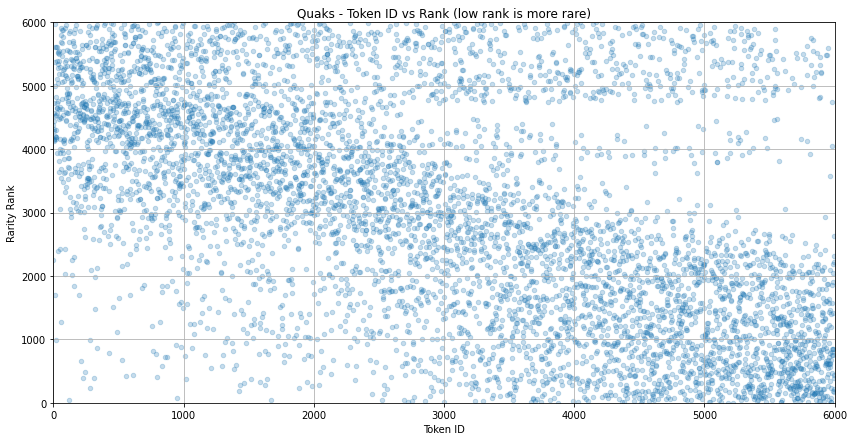

In [3]:
"""
Generate Plot
"""

PATH = f"{config.RARITY_FOLDER}/{FILE}_raritytools.csv"
RARITY_DB = pd.read_csv(PATH)
RARITY_DB = RARITY_DB[RARITY_DB["TOKEN_ID"].duplicated() == False]
print_graph(RARITY_DB, zoom_in=ZOOM_IN)